# Prova 1 - Questão 5

Autora: Luiza Lober de Souza Piva, nUSP: 9302292

### Configuração

In [19]:
#para o teste de McNemar
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.7/233.7 KB 4.7 MB/s eta 0:00:00


In [20]:
#Ler e manipular dataframes e valores
import pandas as pd
import numpy as np
import scipy.stats as sp

#Montar gráficos
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

#Importar os dados
import requests as rq
from io import BytesIO

#Teste de McNemar
from statsmodels.stats.contingency_tables import mcnemar

In [2]:
#Cria o dataframe com as cotas dos deputados
url = 'https://github.com/luizalober/doc-disciplinas/blob/main/estatistica-2s2022/p1/Dados_ECT.xlsx?raw=true'
data = rq.get(url).content
df = pd.read_excel(BytesIO(data))

In [3]:
#Visualizando os dados:
df

,Paciente,sexo,idade,Diagnóstico,Ano,N° Aplicações,condição
0,2,M,33,neurose,1951-1960,6,inalterado
1,7,F,25,psicose,1951-1960,2,inalterado
2,8,F,23,neurose,1951-1960,1,inalterado
3,9,F,16,psicose,1951-1960,19,inalterado
4,10,F,26,psicose,1951-1960,20,inalterado
...,...,...,...,...,...,...,...
988,989,M,44,Depressão,2001-2005,12,melhorado
989,990,F,80,Depressão,2001-2005,14,melhorado
990,991,M,47,psicose,2001-2005,18,melhorado
991,992,F,32,Depressão,2001-2005,13,melhorado


# Gráfico descritivo

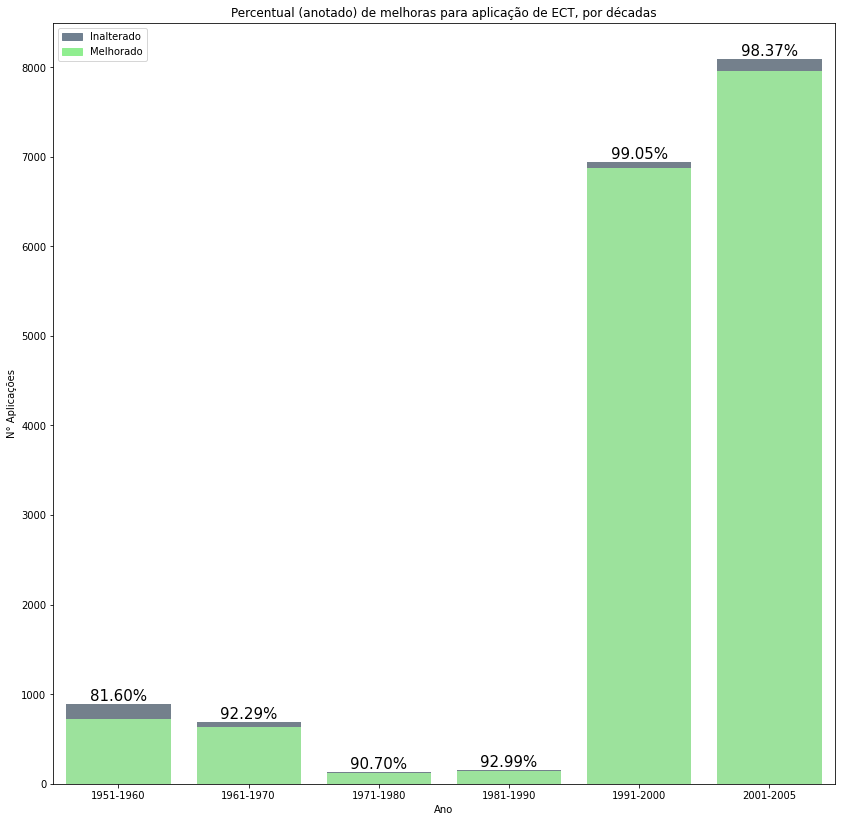

In [4]:
#Seleciona os sucessos dentre todas as tentativas. Usado para calcular a porcentagem
sucessos = df[df.condição=='melhorado'].groupby('Ano')['N° Aplicações'].sum()

plt.figure(figsize=(14, 14))

# Barra superior -> Soma todos os valores(sucessos e fracassos no ECT) para montar a posição das barras
total = df.groupby('Ano')['N° Aplicações'].sum().reset_index()

# Gráfico 1 -> barras superiores (casos sem resultado do ECT)
bar1 = sns.barplot(x="Ano",  y="N° Aplicações", data=total, color='slategrey')

#Cria anotações com as porcentagens
n = 0
for bar in bar1.patches:
  # Usa a função `annotate` do pacote plt
    bar1.annotate(format( (sucessos[n]/(bar.get_height())) , '.2%'),
    (bar.get_x() + bar.get_width() / 2,
     bar.get_height()), ha='center', va='center',
     size=15, xytext=(0, 8),
     textcoords='offset points')
    n = n +1

# Gráfico 2 ->  Apenas resultados com melhora evidenciada
sucesso = df[df.condição=='melhorado']
bar2 = sns.barplot(x="Ano", y="N° Aplicações", data=sucesso, estimator=sum, ci=None,  color='lightgreen')

# Cria a legenda
top_bar = mpatches.Patch(color='slategrey', label='Inalterado')
bottom_bar = mpatches.Patch(color='lightgreen', label='Melhorado')
plt.legend(handles=[top_bar, bottom_bar])

plt.title('Percentual (anotado) de melhoras para aplicação de ECT, por décadas')

# Grafica
plt.show()

Podemos ver que não só há uma melhoria significativa a partir dos anos 1990 na porcentagem de melhorias, como o número de aplicações de ECT aumentou drasticamente comparado às décadas anteriores.

# Porcentagem de melhoria

Para este teste de hipóteses, precisamos ter algumas coisas em mente:
*  As variáveis são qualitativas (melhoria ou não) e pareadas, que podem ser descritas por sucessos ou fracassos na aplicação do ECT;
*  As observações são independentes;
*  Vamos comparar a década de 2001+ com a anterior (1991-2000).

Com essas características, o teste de McNemar será o mais adequado para esse teste de hipóteses.

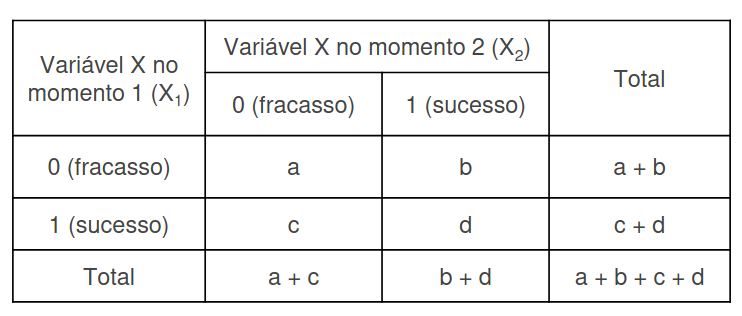

onde
*  $H_0: P(X_1 = 0, X_2 = 1) = P(X_1 = 1, X_2 = 0)$, ou seja, a probabilidade de um elemento da amostra mudar de fracasso para sucesso é a mesma de um ir de sucesso para fracasso;
   * $H_a: P(X_1 = 0, X_2 = 1) \neq P(X_1 = 1, X_2 = 0)$

* $b+c$: número de unidades com respostas discordantes;
* $a+d$: número de observações em concordância;
* $n = a+b+c+d$: tamanho da amostra.

In [38]:
dados_crosstab = pd.crosstab(index=df['Ano'], columns=df['condição'])   #cria a tabela como acima considerando as décadas e os resultados do ECT
dados_crosstab = dados_crosstab.drop(index=['1951-1960', '1961-1970', '1971-1980', '1981-1990'], axis=0)   #remove os valores que não são das décadas de interesse
dados_crosstab

condição,inalterado,melhorado
Ano,,
1991-2000,9,322
2001-2005,17,441


In [45]:
crosstab = pd.DataFrame.to_numpy(dados_crosstab)    #transforma em um array para os cálculos
crosstab

array([[  9, 322],
       [ 17, 441]])

In [46]:
#Implementa o teste
#Referência para essa biblioteca: https://www.statsmodels.org/stable/generated/statsmodels.stats.contingency_tables.mcnemar.html#statsmodels.stats.contingency_tables.mcnemar
print(mcnemar(crosstab))

pvalue      3.634620065197408e-74
statistic   17.0


Como o p-valor acima é muito menor que $α = 0.1$, para 90% de melhoria, decidimos pela hipótese.

# Número de aplicações

Este teste de hipótese, ao contrário do anterior, é paramétrico nas variáveis de interesse (número de aplicações). As outras hipóteses levantadas acima ainda são válidas.

* Note que aqui não foi especificado o intervalo de interesse. Por isto, vamos utilizar todas as décadas do conjunto de dados, inicialmente, e depois comparar com o intervalo anterior.

Podemos então utilizar o teste de Wilcox para decidir pela hipótese, que será  "grupo de aplicações com resultado positivo maior do que o negativo" e usará $α=0.05$.

In [76]:
#Define o número de fracassos por década
#-> o de sucessos já está definido acima na seção "Gráfico descritivo"
fracassos = df[df.condição=='inalterado'].groupby('Ano')['N° Aplicações'].sum()
fracassos

Ano
1951-1960    163
1961-1970     53
1971-1980     12
1981-1990     11
1991-2000     66
2001-2005    132
Name: N° Aplicações, dtype: int64

In [96]:
#O dataframe tem como valores as aplicações por década e seus resultados
d = {'Ano': df['Ano'].unique(), 'melhorado': pd.Series.to_numpy(sucessos), 'inalterado': pd.Series.to_numpy(fracassos)}
dados_sf = pd.DataFrame(data=d)
dados_sf

,Ano,melhorado,inalterado
0,1951-1960,723,163
1,1961-1970,634,53
2,1971-1980,117,12
3,1981-1990,146,11
4,1991-2000,6875,66
5,2001-2005,7958,132


In [90]:
#Implementa o teste para todas as décadas
sp.wilcoxon(dados_sf['melhorado'], dados_sf['inalterado'])

WilcoxonResult(statistic=0.0, pvalue=0.03125)

O que implica que a hipótese deve ser rejeitada (p-valor $< α$)

In [97]:
#Agora, calcula para as mesmas décadas da questão anterior
dados_sf = dados_sf.drop(index=[0,1,2,3], axis=0) 
dados_sf

,Ano,melhorado,inalterado
4,1991-2000,6875,66
5,2001-2005,7958,132


In [106]:
#Realiza o mesmo teste, mas somente para as duas últimas décadas
sp.wilcoxon(dados_sf['melhorado'], dados_sf['inalterado'])

WilcoxonResult(statistic=0.0, pvalue=0.5)

De onde podemos aceitar a hipótese por p-valor $> α$

**Conclusão**: a grande alteração no número de aplicações com resultado positivo após a década de 80 é de grande influência no aceite ou na rejeição da hipótese.